<a href="https://colab.research.google.com/github/StillWork/c9/blob/master/gg_55_fast_2_image_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 이미지 다운받기

### 런타임  GPU 확인 !!

* (참고)by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

자신의 PC에서 구글 이미지를 스크롤한 후 이를 다운 받을 수 있다. 구글은 700장의 사진까지 다운받을 수 있다.

스크롤한 이미지의 URL을 저장하는 자바스크립트를 수행한다. 아래와 같은 명령으로 창을 만든다. 

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac


아래 스크립트를 실행한다.


```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### 이미지를 다운로드할 폴더를 만들고 위에서 만든 url 파일을 업로드한다.

In [0]:
# fastai 패키지 설치
from fastai import *
from fastai.vision import *

In [0]:
import os, os.path, shutil
if not os.path.exists("./bears"):
    os.makedirs("./bears")

In [3]:
# 구글에서 검색한 이미지 주소 url 목록 업로드 teddys.csv,... 등
from google.colab import files
files.upload()

Saving blacks.csv to blacks.csv
Saving grizzley.csv to grizzley.csv
Saving white.csv to white.csv


{'blacks.csv': b'http://constantine.typepad.com/.a/6a0120a7fc3be9970b017d4260912e970c-pi\nhttps://mountainjournal.org/content/articles/ic_1532965825_780x_false.jpg\nhttp://mediad.publicbroadcasting.net/p/wjct/files/201505/8716687817_d1931ca433_o.jpg\nhttps://www.wildawareutah.org/wp-content/uploads/BlackBearSign_Page_1_Image_0003-229x300.jpg\nhttps://www.gannett-cdn.com/-mm-/0e47cd358e67f6970b213292b95d3e545f64c156/c=284-620-1541-1565/local/-/media/2017/07/10/DetroitFreeP/DetroitFreePress/636352417011302799-black-bears-graphic-thierry.jpg?width=540&height=405&fit=crop\nhttps://upload.wikimedia.org/wikipedia/commons/thumb/0/08/01_Schwarzb%C3%A4r.jpg/220px-01_Schwarzb%C3%A4r.jpg\nhttps://defenders.org/sites/default/files/styles/homepage-feature-2015/public/black-bear_duane-cross.png?itok=c_7r6m_j\nhttps://www.mdwfp.com/media/253603/_bear_black_frontal.gif?width=500&height=331.9292333614153\nhttps://wildlife.org/wp-content/uploads/2017/03/blackbear.png\nhttps://images.immediate.co.uk/vola

In [4]:
!ls

bears		       best_model.02-0.64.h5  blacks.csv    white.csv
best_model.01-0.59.h5  best_model.03-0.64.h5  data
best_model.01-0.71.h5  best_model.04-0.63.h5  grizzley.csv
best_model.02-0.47.h5  best_model.06-0.63.h5  sample_data


In [5]:
!mv *.csv ./bears
!ls bears

blacks.csv  grizzley.csv  white.csv


아래는 폴더 이름이다. url은 같은 이름 + .csv로 만든 것을 가정하였다. 즉, 아래 classes 리스트에 있는 이름의 url 파일을 작업 서버로 업로드 해두어야 한다.

In [6]:
classes = ['blacks','grizzley','white']
for name in classes:
    path = Path('./bears')
    dest = path/name
    dest.mkdir(parents=True, exist_ok=True)
    file = name+'.csv'
    download_images(path/file, dest, max_pics=200)

Error https://www.washingtonpost.com/resizer/vn6pmHdQPxRzwhhFkpSEsmUp9Qc=/534x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/XK6YBT5GSE2LROLN3FO4WRK5JI.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


Error https://www.washingtonpost.com/resizer/3XR_4pCQML_c_PWsg5ByKcFsJow=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AUEKO7HTGII6RGOCZ7FG7T3BBQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


Error https://zooportraits.com/wp-content/uploads/2018/06/shutterstock_550201213.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error http://blogs.discovermagazine.com/d-brief/files/2014/05/polar-bear.jpg HTTPConnectionPool(host='blogs.discovermagazine.com', port=80): Max retries exceeded with url: /d-brief/files/2014/05/polar-bear.jpg (Caused by ReadTimeoutError("HTTPConnectionPool(host='blogs.discovermagazine.com', port=80): Read timed out. (read timeout=4)",))


## 다운로드한 이미지를 확인한다.

In [7]:
for name in classes:
    print(name)
    verify_images(path/name, delete=True, max_workers=8)

blacks


cannot identify image file <_io.BufferedReader name='bears/blacks/00000026.jpg'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000020.png'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000177.jpg'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000187.jpg'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000184.png'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000111.jpg'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000174.jpg'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000060.jpg'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000090.jpg'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000035.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:938: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='bears/blacks/00000151.jpg'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000008.png'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='bears/blacks/00000198.jpg'>
grizzley


cannot identify image file <_io.BufferedReader name='bears/grizzley/00000058.jpg'>
cannot identify image file <_io.BufferedReader name='bears/grizzley/00000088.jpg'>
cannot identify image file <_io.BufferedReader name='bears/grizzley/00000084.jpg'>
cannot identify image file <_io.BufferedReader name='bears/grizzley/00000140.jpg'>
cannot identify image file <_io.BufferedReader name='bears/grizzley/00000133.jpg'>
cannot identify image file <_io.BufferedReader name='bears/grizzley/00000155.jpg'>
cannot identify image file <_io.BufferedReader name='bears/grizzley/00000164.jpg'>
cannot identify image file <_io.BufferedReader name='bears/grizzley/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='bears/grizzley/00000160.jpg'>
cannot identify image file <_io.BufferedReader name='bears/grizzley/00000188.jpg'>
white


cannot identify image file <_io.BufferedReader name='bears/white/00000094.jpg'>
cannot identify image file <_io.BufferedReader name='bears/white/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='bears/white/00000145.jpg'>
cannot identify image file <_io.BufferedReader name='bears/white/00000104.jpg'>
cannot identify image file <_io.BufferedReader name='bears/white/00000070.jpeg'>
cannot identify image file <_io.BufferedReader name='bears/white/00000193.jpg'>
cannot identify image file <_io.BufferedReader name='bears/white/00000130.jpg'>
cannot identify image file <_io.BufferedReader name='bears/white/00000063.jpeg'>
cannot identify image file <_io.BufferedReader name='bears/white/00000081.jpg'>
cannot identify image file <_io.BufferedReader name='bears/white/00000171.jpg'>


## 이미지 확인

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, 
        num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['blacks', 'grizzley', 'white']

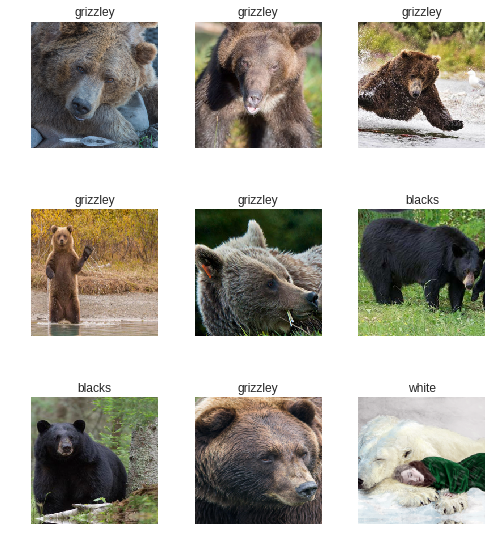

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['blacks', 'grizzley', 'white'], 3, 448, 112)

## Train model

In [12]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 24156450.38it/s]


In [0]:
learn.fit_one_cycle(2) #  4--> 2

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


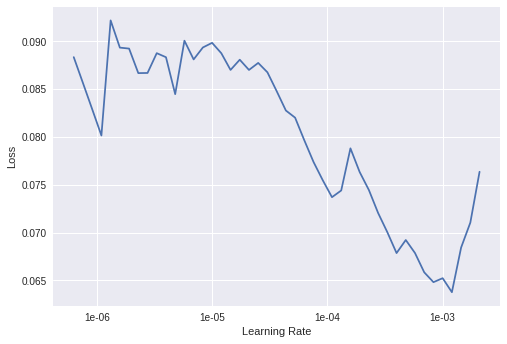

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

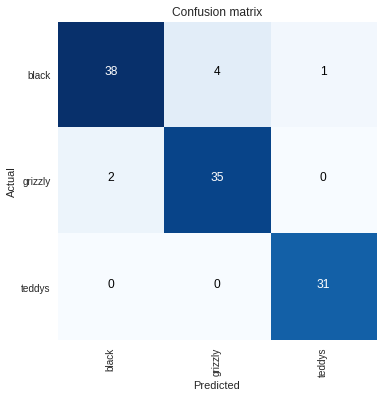

In [0]:
interp.plot_confusion_matrix()

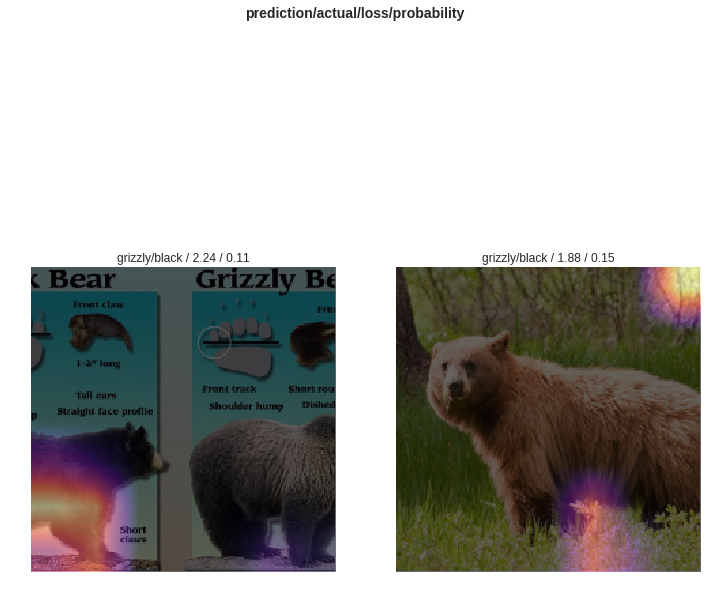

In [0]:
interp.plot_top_losses(2)

In [0]:
from fastai.widgets import *

In [0]:
# 오류가 큰 데이터셋과 인덱스를 얻는다
# ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

해당 파일 목록을 cleaned.csv에 저장한다  
### 유사중복 이미지
유사한 (중복된) 이미지는 .from_similars으로 찾을 수 있다.  
ImageCleaner를 실행할 때 duplicates=True 옵션을 준다.  


In [0]:
# HANGGING ON....
# ImageCleaner(ds, idxs, path)

In [0]:
# ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

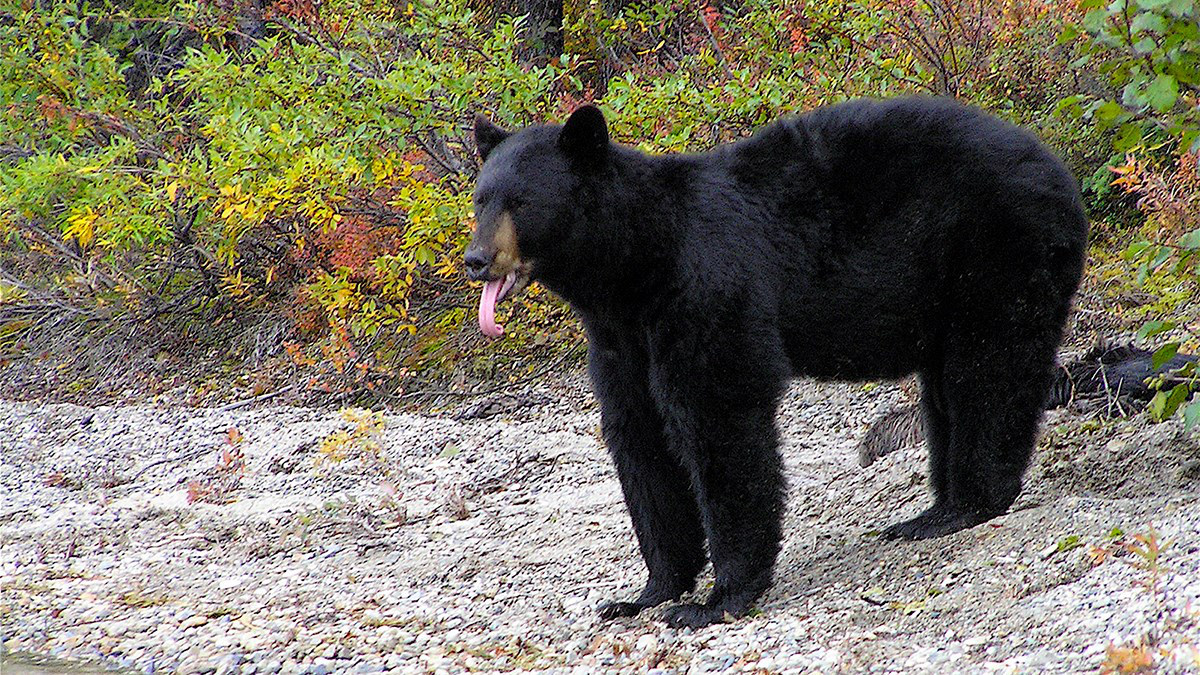

In [0]:
img = open_image(path/'black'/'00000021.jpg')
img

In [0]:
# FileDeleter가 설치되지 않음

# losses,idxs = interp.top_losses()
# top_loss_paths = data.valid_ds.x[idxs]
# fd = FileDeleter(file_paths=top_loss_paths)

In [0]:
# export.pkl을 생성한다.
learn.export()

In [0]:
!ls bears

black  black.csv  export.pkl  grizzly  grizzly.csv  models  teddys  teddys.csv


In [0]:
# 실행환경은 CPU일 것이므로 환경을 변경한다.
defaults.device = torch.device('cpu')

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

black


In [0]:
pred_class

In [0]:
# 훈련에 사용한 모델을 불러온다. 오류 발생...
# classes = ['black', 'grizzly', 'teddys']
# data2 = ImageDataBunch.single_from_classes(path, classes, 
#            tfms=get_transforms(), size=224).normalize(imagenet_stats)
# learn = create_cnn(data2, models.resnet34)
# learn.load('stage-2')

TypeError: ignored

In [0]:
??learn.predict